In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,NaN,1065.0
1,NaN,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,NaN,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,NaN,NaN,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,NaN,95.0,1.68,NaN,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,NaN,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,NaN,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,NaN,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	8
float64		column 3	29
float64		column 4	22
float64		column 5	15
float64		column 6	7
float64		column 7	14
float64		column 8	7
float64		column 9	21
float64		column 10	21
float64		column 11	7
float64		column 12	22
float64		column 13	22


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,157.000000,170.000000,149.000000,156.000000,163.000000,171.000000,164.000000,171.000000,157.000000,157.000000,171.000000,156.000000,156.000000
mean,13.006624,2.345706,2.381946,19.495513,100.226994,2.290468,2.041829,0.361813,1.595987,5.092611,0.955474,2.608269,742.532051
std,0.807872,1.120811,0.259393,3.154645,14.156663,0.610712,0.970020,0.122362,0.555955,2.308952,0.223560,0.684397,307.445656
min,11.030000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.610000,2.260000,17.350000,89.000000,1.765000,1.242500,0.270000,1.260000,3.300000,0.790000,1.990000,508.000000
50%,13.050000,1.870000,2.380000,19.500000,98.000000,2.360000,2.155000,0.340000,1.550000,4.700000,0.960000,2.775000,675.000000
75%,13.670000,3.082500,2.580000,21.500000,108.000000,2.800000,2.892500,0.430000,1.920000,6.130000,1.120000,3.160000,973.750000
max,14.830000,5.800000,3.220000,28.500000,162.000000,3.880000,3.930000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

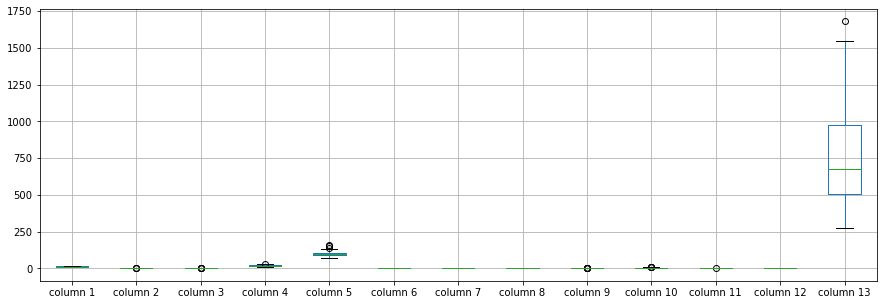

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.006624
column 2       2.345706
column 3       2.381946
column 4      19.495513
column 5     100.226994
column 6       2.290468
column 7       2.041829
column 8       0.361813
column 9       1.595987
column 10      5.092611
column 11      0.955474
column 12      2.608269
column 13    742.532051
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.076854,0.237378,-0.328474,0.251645,0.226897,0.294678,-0.129185,0.162028,0.522064,-0.005467,0.062633,0.602905
column 2,0.076854,1.000000,0.154712,0.353295,-0.064367,-0.316102,-0.387856,0.284483,-0.271494,0.248165,-0.562598,-0.395516,-0.218484
column 3,0.237378,0.154712,1.000000,0.399163,0.313318,0.085583,0.070272,0.198450,-0.078440,0.233413,-0.020138,-0.071763,0.201543
column 4,-0.328474,0.353295,0.399163,1.000000,-0.056037,-0.393700,-0.492861,0.332847,-0.288687,0.022101,-0.302120,-0.320244,-0.509271
column 5,0.251645,-0.064367,0.313318,-0.056037,1.000000,0.199829,0.157742,-0.205452,0.230591,0.211272,0.092460,0.102335,0.361005
column 6,0.226897,-0.316102,0.085583,-0.393700,0.199829,1.000000,0.860952,-0.431286,0.602694,-0.090378,0.428663,0.703221,0.455742
column 7,0.294678,-0.387856,0.070272,-0.492861,0.157742,0.860952,1.000000,-0.564397,0.644277,-0.168868,0.523861,0.780542,0.516872
column 8,-0.129185,0.284483,0.198450,0.332847,-0.205452,-0.431286,-0.564397,1.000000,-0.331931,0.156956,-0.246994,-0.466401,-0.339209
column 9,0.162028,-0.271494,-0.078440,-0.288687,0.230591,0.602694,0.644277,-0.331931,1.000000,0.037757,0.309391,0.510334,0.375743
column 10,0.522064,0.248165,0.233413,0.022101,0.211272,-0.090378,-0.168868,0.156956,0.037757,1.000000,-0.518649,-0.401024,0.290465


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+81,13+81+81,13+81+81,13+81+81+81+81,13+81+81+81+81+81,13+81+81+81+81+81+81,13+81+81+81+81+81,13+81+81+81+81,13+81+81+81,13+81+81,13+81,13], vae_layer = False, seed = 810)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 838.2394686612216
Epoch: 1 , loss: 844.2700361772017
Epoch: 2 , loss: 840.4967595880681
Epoch: 3 , loss: 844.3372747247869
Epoch: 4 , loss: 838.3131103515625
Epoch: 5 , loss: 841.1126043146306
Epoch: 6 , loss: 837.1166048916904
Epoch: 7 , loss: 839.7210637872869
Epoch: 8 , loss: 834.4185624556108
Epoch: 9 , loss: 843.0333584872159
Epoch: 10 , loss: 839.6510231711648
Epoch: 11 , loss: 843.315019087358
Epoch: 12 , loss: 843.1757368607955
Epoch: 13 , loss: 840.3875233043324
Epoch: 14 , loss: 833.1358087713069
Epoch: 15 , loss: 840.7788363370029
Epoch: 16 , loss: 834.3383678089489
Epoch: 17 , loss: 827.35107421875
Epoch: 18 , loss: 831.3579378995029
Epoch: 19 , loss: 821.7009055397727
Epoch: 20 , loss: 826.0860318270596
Epoch: 21 , loss: 826.2983342950994
Epoch: 22 , loss: 813.8989202325994
Epoch: 23 , loss: 820.6575927734375
Epoch: 24 , loss: 809.1505348899148
Epoch: 25 , loss: 811.378173828125
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3.507891,0.00000
1,-9.861586,0.000000,-1.276666,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,-2.340131,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.904234,-2.665625,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.000000,-1.617023,0.000000,0.000000,1.333941,0.0,0.0,0.0,0.000000,0.000000,0.00000
174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.299763,0.0,0.0,0.0,0.000000,0.000000,0.00000
175,0.000000,-1.528494,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000
176,0.000000,0.000000,0.000000,0.000000,-115.069642,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3618.2129145731287, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.33200468046936926

In [18]:
new_df.iloc[66,:]

column 1      13.11000
column 2       1.01000
column 3       1.12432
column 4      15.00000
column 5      78.00000
column 6       2.98000
column 7       3.18000
column 8       0.26000
column 9       0.79516
column 10      5.30000
column 11      1.12000
column 12      0.82101
column 13    502.00000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.060000,0.28,2.29,5.64,1.040000,7.427891,1065.00000
1,3.338414,1.780000,0.863334,11.200000,100.000000,2.650000,2.760000,0.26,1.28,4.38,1.050000,3.400000,1050.00000
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.30,2.81,5.68,1.030000,3.170000,1185.00000
3,14.370000,1.950000,2.500000,16.800000,113.000000,1.509869,3.490000,0.24,2.18,7.80,0.860000,3.450000,1480.00000
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.690000,0.39,1.82,4.32,0.135766,0.264375,735.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.450000,18.882977,95.000000,1.680000,1.943941,0.52,1.06,7.70,0.640000,1.740000,740.00000
174,13.400000,3.910000,2.480000,23.000000,102.000000,1.800000,2.049763,0.43,1.41,7.30,0.700000,1.560000,750.00000
175,13.270000,2.751506,2.260000,20.000000,120.000000,1.590000,0.690000,0.43,1.35,10.20,0.590000,1.560000,835.00000
176,13.170000,2.590000,2.370000,20.000000,4.930358,1.650000,0.680000,0.53,1.46,9.30,0.600000,1.620000,840.00000


In [20]:
imputations[-1].to_excel("Wine_NE_10(imp).xlsx", index=False, header=False)